# Run the following code to download the MNIST dataset (For numpy based task)


In [ ]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


# The load() function will return the training and test dataset

In [ ]:
import numpy as np
from urllib import request
import gzip
import math
import pickle


def grad_softmax_crossentropy(X, y):
    m = y.shape[0]
    ones_for_answers = np.zeros_like(X)
    ones_for_answers[np.arange(len(X)), y] = 1

    p = np.exp(X) / np.exp(X).sum(axis=-1, keepdims=True)
    return (- ones_for_answers + p) / m

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels


TRimg,TRlab,TSimg,TSlab=load()
print(len(TRimg),len(TRlab),len(TSimg),len(TSlab))
print(len(TRimg[0]),len(TRlab),len(TSimg[0]),len(TSlab))

arr_2d = np. reshape(TRimg[0], (28, 28))

60000 60000 10000 10000
784 60000 784 10000


In [ ]:
print(TRimg.shape)
Batch=TRimg[0:32]
print(Batch.shape)
# for each layer we need matrix of weights and vector of something
# task -> dataset -> model -> loss -> gradient descent
# output is number of possible results, 3 for color diagram, 10 for number classify
# use softmax (X x W + B)

(60000, 784)
(32, 784)


## If you are interested in what the data looks like. You can run the following code to see.

6


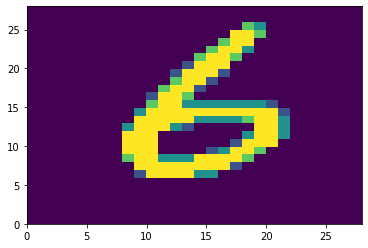

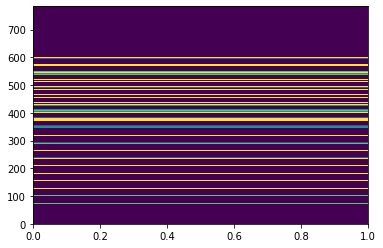

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

showInd=66
Column=np.reshape(TRimg[showInd], (784, 1))
arr_2d = np.reshape(TRimg[showInd], (28, 28))
arr_2dT=np.rot90(arr_2d)
arr_2dTA=np.rot90(arr_2dT)
Final=np.fliplr(arr_2dTA)
#arr_2dTA=np.transpose(arr_2dT)
#arr_2dTB=np.transpose(arr_2dTA)
plt.pcolor(Final)
print(TRlab[showInd])
plt.show()

plt.pcolor(Column)
plt.show()

#pcm = plt.pcolormesh(arr_2d,cmap='RdBu_r')
#plt.colorbar(pcm)
#plt.show()

# [For dataset loading in Pytorch, you can refer to the following example code](https://github.com/pytorch/examples/blob/master/mnist/main.py)

https://github.com/pytorch/examples/blob/master/mnist/main.py 


# The following is a demo for getting the dataset when using Pytorch (For the second task)

In [ ]:
from __future__ import print_function

import numpy as np
from urllib import request
import gzip
import math
import pickle
from time import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable



# Training settings batch_size & learning rate
batch_size = 32
lr=0.01


# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
